# Hypothesis Testing (core)

Aaron Musselwhite 
10/30/22

## Questions to Answer

- Q1. Do smokers have higher insurance charges than non-smokers?

- Q2. Are men more likely to smoke than women?

- Q3. Do different regions have different charges, on average?

In [2]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.8.1'

In [3]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
## Drop null values from related columns
df = df.dropna(subset=['smoker','charges'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  Q1. Do smokers have higher insurance charges than non-smokers?

 (Null Hypothesis): There is no difference between charged amounts for Smokers vs Non-Smokers.
 
 (Alternative Hypothesis): There is a significant difference between charged amounts for Smokers vs Non-Smokers.



In [7]:
## check the col that contains the measurement
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
df['smoke'] = df['smoker'].str.contains('yes')
df['smoke'].value_counts(normalize=True)

False    0.795217
True     0.204783
Name: smoke, dtype: float64

In [10]:
cols4later = ['smoke','charges']

In [12]:
nonsmoke_df = df.loc[df['smoke']==False, cols4later]
nonsmoke_df

,smoke,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [13]:
smoke_df = df.loc[df['smoke']==True, cols4later]
smoke_df

,smoke,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [14]:
plot_df =  pd.concat([nonsmoke_df,smoke_df])
plot_df

,smoke,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


<AxesSubplot:xlabel='smoke', ylabel='charges'>

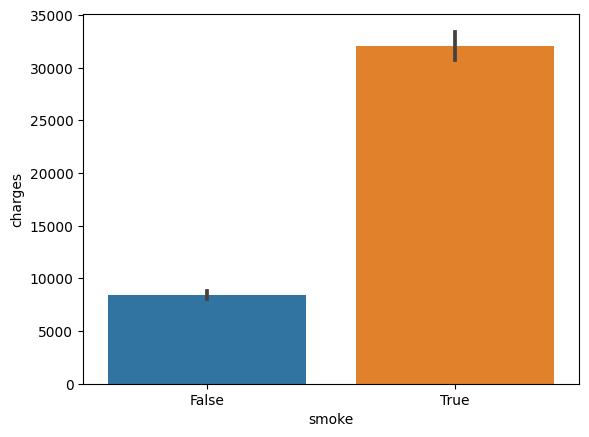

In [16]:
sns.barplot(data=plot_df, x='smoke', y='charges')

##  Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

In [17]:
nonsmoke_group = nonsmoke_df['charges']
smoke_group = smoke_df['charges']
nonsmoke_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [18]:
smoker_outliers =  np.abs(stats.zscore(smoke_group)) > 3

## how many outliers?
smoker_outliers.sum()

0

In [19]:
nonsmoke_outliers =  np.abs(stats.zscore(nonsmoke_group)) > 3

## how many outliers?
nonsmoke_outliers.sum()

24

In [20]:
nonsmoke_grp_cln = nonsmoke_group[nonsmoke_outliers==False]
nonsmoke_grp_cln

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [21]:
stats.normaltest(smoke_group)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [22]:
len(smoke_group)

274

In [23]:
stats.normaltest(nonsmoke_grp_cln)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [24]:
len(nonsmoke_grp_cln)

1040

- group n is large enought to bypass.

### Test for Equal Variances

In [25]:
## Use Levene's test for equal variance
result = stats.levene(nonsmoke_grp_cln, smoke_group)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [26]:
## Use an if-else to help interpret the p-value
result.pvalue < .05

True

### Final Hypothesis Test

In [27]:
## run final hypothess test
final_result =stats.ttest_ind(nonsmoke_grp_cln, smoke_group, equal_var=False)
final_result

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)

In [28]:
final_result.pvalue <.00000001

True

In [29]:
smoke_group.mean()

32050.23183153284

In [30]:
nonsmoke_grp_cln.mean()

7939.8608446721155

### Final Conclusion:
- Smokers are charged more for insurance than Non-Smokers

## Q2. Are men more likely to smoke than women?

1. State the Hypothesis & Null Hypothesis
 - (Null Hypothesis): There is no difference between men smokers and women smokers
 
 - (Alternative Hypothesis): There is a significant difference between men smokers and women smokers
 
 


In [32]:
smoke_df = df
smoke_df['smoker'] = smoke_df['smoker'].apply(lambda x:0 if x=='no' else 1)
smoke_df.head()

,age,sex,bmi,children,smoker,region,charges,smoke
0,19,female,27.900,0,1,southwest,16884.92400,True
1,18,male,33.770,1,0,southeast,1725.55230,False
2,28,male,33.000,3,0,southeast,4449.46200,False
3,33,male,22.705,0,0,northwest,21984.47061,False
4,32,male,28.880,0,0,northwest,3866.85520,False


In [44]:
table =pd.crosstab(smoke_df['sex'],smoke_df['smoker'])
table



smoker,0,1
sex,,
female,547,115
male,517,159


In [46]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

print(p)
p<0.05

0.006548143503580696


True

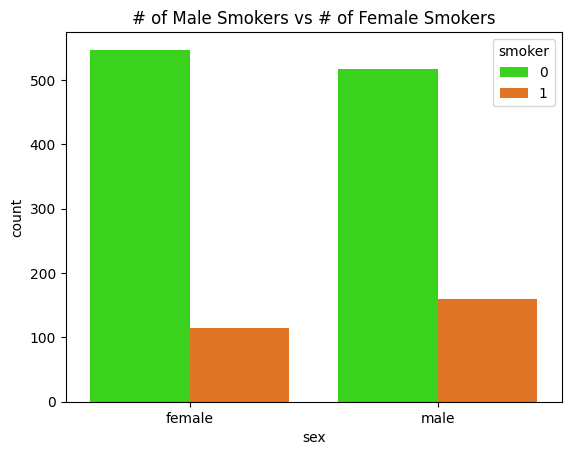

In [47]:
ax = sns.countplot(data=smoke_df, x='sex', hue='smoker', palette= 'gist_ncar')
ax.set_title('# of Male Smokers vs # of Female Smokers');

- Based on our visual and by our p value we can safely reject the null hypothesis and accept the alternate one. Men are more likely to smoke than Women

## Question 3: Do different regions have different charges, average?

- Null hypothesis: region does not have an effect on charges

- Alternate hypothesis: region does have an effect on charges.



In [48]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [49]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [50]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [51]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [61]:
stats.levene(*groups.values())



LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [62]:
result.pvalue < .05

True

In [66]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [64]:
result.pvalue < .05

True

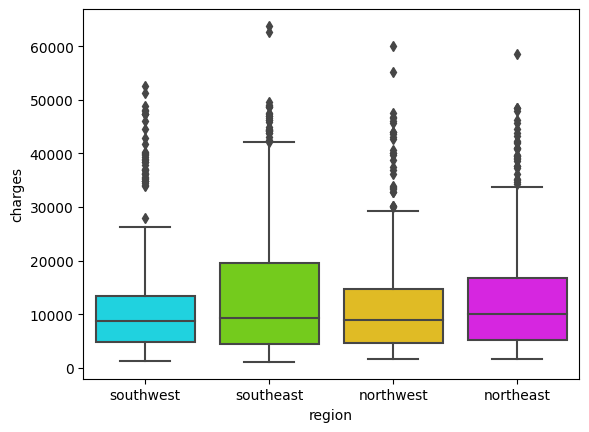

In [57]:
sns.boxplot(data=df, x='region', y='charges', palette='gist_ncar');

- Based on the visual and the fact that that our pvalue was < .05 we can safely reject the null hypothesis and support the alternative that region does have an effect on charges, albiet a small one